<a href="https://colab.research.google.com/github/maleehahassan/HIDA_Into_to_DL/blob/main/05-transfer-resnet-vgg-cifar10(correction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview: CIFAR10 Classification with Transfer Learning (ResNet-50 vs VGG-19)

This notebook demonstrates how to use transfer learning for image classification on the CIFAR10 dataset, comparing two powerful pretrained models: ResNet-50 and VGG-19. The workflow includes:

- **Importing Libraries**: Essential Python libraries for deep learning, data manipulation, and visualization are imported.
- **Loading Data**: The CIFAR10 dataset is loaded, which contains 60,000 color images in 10 classes.
- **Preprocessing**: Images are resized to 224x224 pixels to match the input size required by ResNet-50 and VGG-19. Pixel values are normalized to the [0, 1] range.
- **Visualization**: 25 sample images from the training set are displayed with their class names for a quick visual check.
- **Model Setup**: Two models are built using transfer learning:
    - ResNet-50 and VGG-19 are loaded with pretrained weights (from ImageNet), excluding their top layers.
    - A new classification head is added to each model for CIFAR10.
    - The base models are frozen so only the new layers are trained.
- **Training**: Both models are trained on the preprocessed CIFAR10 data for 10 epochs.
- **Evaluation**: Training histories are visualized, and both models are evaluated on the test set to compare their accuracy.
- **Confusion Matrix**: Confusion matrices are plotted for both models to show how well each class is predicted.
- **Summary**: The notebook concludes with a summary, encouraging learners to experiment further.

---

This workflow teaches how to apply state-of-the-art deep learning architectures to a new dataset, compare their performance, and understand the benefits of transfer learning.

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Set the number of images to use for training
n_images = 500
n_test = 100

# Select the first n_images for training
train_images = train_images[:n_images]
train_labels = train_labels[:n_images]

# Select the first n_test for testing
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

In [4]:
# Resize images to 224x224 for compatibility with pretrained models
IMG_SIZE = 224
train_images_resized = tf.image.resize(train_images, [IMG_SIZE, IMG_SIZE])
test_images_resized = tf.image.resize(test_images, [IMG_SIZE, IMG_SIZE])

In [5]:
# Normalize pixel values to [0, 1]
train_images_resized = train_images_resized / 255.0
test_images_resized = test_images_resized / 255.0

In [6]:
# Define class names for CIFAR10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

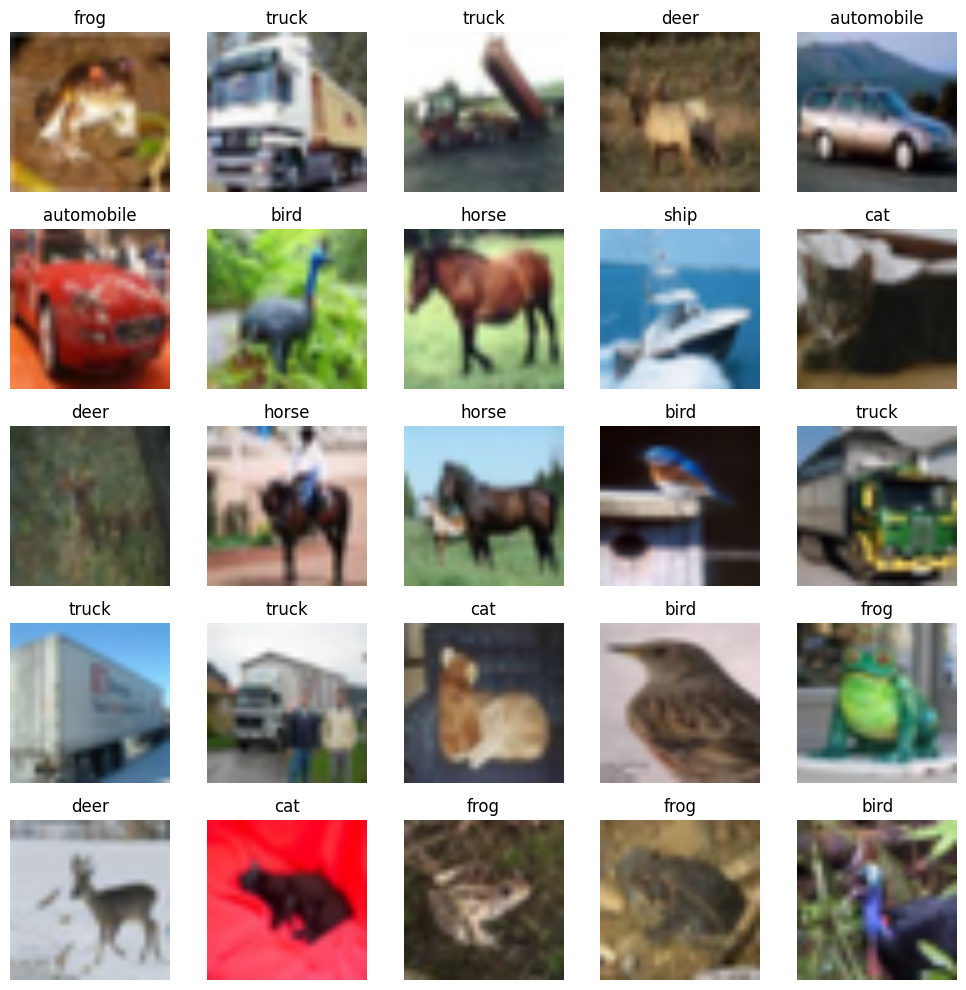

In [7]:
# Display 25 sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    img = train_images_resized[i]
    # Ensure image is RGB and in [0,1] range
    if img.shape[-1] == 3:
        plt.imshow(img)
    else:
        plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(class_names[int(train_labels[i,0])])
    # Remove colorbar if accidentally added
    ax = plt.gca()
    for cbar in ax.figure.axes:
        if hasattr(cbar, 'colorbar'):
            cbar.colorbar.remove()
plt.tight_layout()
plt.show()

In [8]:
# Prepare labels for training (flatten)
train_labels_flat = train_labels.flatten()
test_labels_flat = test_labels.flatten()

In [9]:
# Load ResNet-50 via keras.applications
base_resnet = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
# Freeze base model
base_resnet.trainable = False
# Add classification head
resnet_model = keras.Sequential([
    base_resnet,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# Compile ResNet-50 model
resnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [11]:
# Train ResNet-50 model
history_resnet = resnet_model.fit(train_images_resized, train_labels_flat, epochs=10,
                                  batch_size=64,
                                  validation_data=(test_images_resized, test_labels_flat),
                                  verbose=2)

Epoch 1/10
8/8 - 91s - 11s/step - accuracy: 0.1120 - loss: 2.6933 - val_accuracy: 0.1000 - val_loss: 2.3753
Epoch 2/10
8/8 - 78s - 10s/step - accuracy: 0.0860 - loss: 2.4465 - val_accuracy: 0.1600 - val_loss: 2.2952
Epoch 3/10
8/8 - 83s - 10s/step - accuracy: 0.1000 - loss: 2.3252 - val_accuracy: 0.0600 - val_loss: 2.3151
Epoch 4/10
8/8 - 82s - 10s/step - accuracy: 0.1080 - loss: 2.3201 - val_accuracy: 0.0600 - val_loss: 2.3025
Epoch 5/10
8/8 - 72s - 9s/step - accuracy: 0.1220 - loss: 2.3052 - val_accuracy: 0.0600 - val_loss: 2.3072
Epoch 6/10
8/8 - 89s - 11s/step - accuracy: 0.1160 - loss: 2.2999 - val_accuracy: 0.0600 - val_loss: 2.3070
Epoch 7/10
8/8 - 87s - 11s/step - accuracy: 0.1320 - loss: 2.3011 - val_accuracy: 0.0600 - val_loss: 2.3130
Epoch 8/10
8/8 - 73s - 9s/step - accuracy: 0.1160 - loss: 2.2962 - val_accuracy: 0.0600 - val_loss: 2.3148
Epoch 9/10
8/8 - 89s - 11s/step - accuracy: 0.1080 - loss: 2.3021 - val_accuracy: 0.1400 - val_loss: 2.3086
Epoch 10/10
8/8 - 83s - 10s/st

In [12]:
# Load VGG-19 via keras.applications
base_vgg = keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
# Freeze base model
base_vgg.trainable = False
# Add classification head
vgg_model = keras.Sequential([
    base_vgg,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
# Compile VGG model
vgg_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [14]:
# Train VGG model
history_vgg = vgg_model.fit(train_images_resized, train_labels_flat, epochs=10,
                            batch_size=64,
                            validation_data=(test_images_resized, test_labels_flat),
                            verbose=2)

Epoch 1/10
8/8 - 329s - 41s/step - accuracy: 0.1000 - loss: 2.4809 - val_accuracy: 0.1000 - val_loss: 2.2994
Epoch 2/10
8/8 - 332s - 41s/step - accuracy: 0.1160 - loss: 2.3746 - val_accuracy: 0.0600 - val_loss: 2.2685
Epoch 3/10
8/8 - 332s - 41s/step - accuracy: 0.1460 - loss: 2.2867 - val_accuracy: 0.1700 - val_loss: 2.2230
Epoch 4/10
8/8 - 296s - 37s/step - accuracy: 0.1880 - loss: 2.1962 - val_accuracy: 0.2900 - val_loss: 2.1988
Epoch 5/10
8/8 - 319s - 40s/step - accuracy: 0.1940 - loss: 2.1960 - val_accuracy: 0.2400 - val_loss: 2.1742
Epoch 6/10
8/8 - 353s - 44s/step - accuracy: 0.2280 - loss: 2.1664 - val_accuracy: 0.2500 - val_loss: 2.1627
Epoch 7/10
8/8 - 291s - 36s/step - accuracy: 0.2180 - loss: 2.1538 - val_accuracy: 0.2900 - val_loss: 2.1371
Epoch 8/10
8/8 - 324s - 41s/step - accuracy: 0.2620 - loss: 2.1113 - val_accuracy: 0.2900 - val_loss: 2.1037
Epoch 9/10
8/8 - 326s - 41s/step - accuracy: 0.2560 - loss: 2.1037 - val_accuracy: 0.2900 - val_loss: 2.0851
Epoch 10/10
8/8 - 3

In [15]:
# Convert training histories to DataFrames
history_resnet_df = pd.DataFrame(history_resnet.history)
history_vgg_df = pd.DataFrame(history_vgg.history)

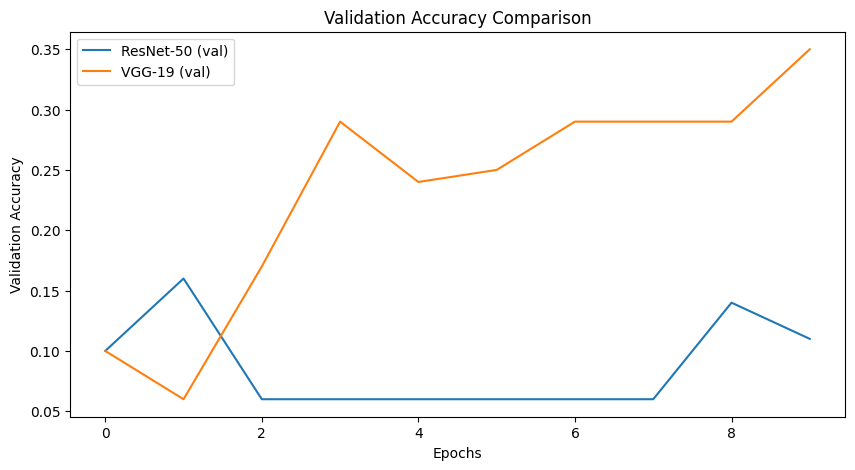

In [16]:
# Plot training and validation accuracy for both models
plt.figure(figsize=(10,5))
sns.lineplot(data=history_resnet_df['val_accuracy'], label='ResNet-50 (val)')
sns.lineplot(data=history_vgg_df['val_accuracy'], label='VGG-19 (val)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

In [17]:
# Evaluate both models on the test set
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images_resized, test_labels_flat, verbose=2)
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images_resized, test_labels_flat, verbose=2)
print(f'ResNet-50 Test Accuracy: {resnet_test_acc:.3f}')
print(f'VGG-19 Test Accuracy: {vgg_test_acc:.3f}')

4/4 - 13s - 3s/step - accuracy: 0.1100 - loss: 2.3020
4/4 - 49s - 12s/step - accuracy: 0.3500 - loss: 2.0606
ResNet-50 Test Accuracy: 0.110
VGG-19 Test Accuracy: 0.350


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 11s/step


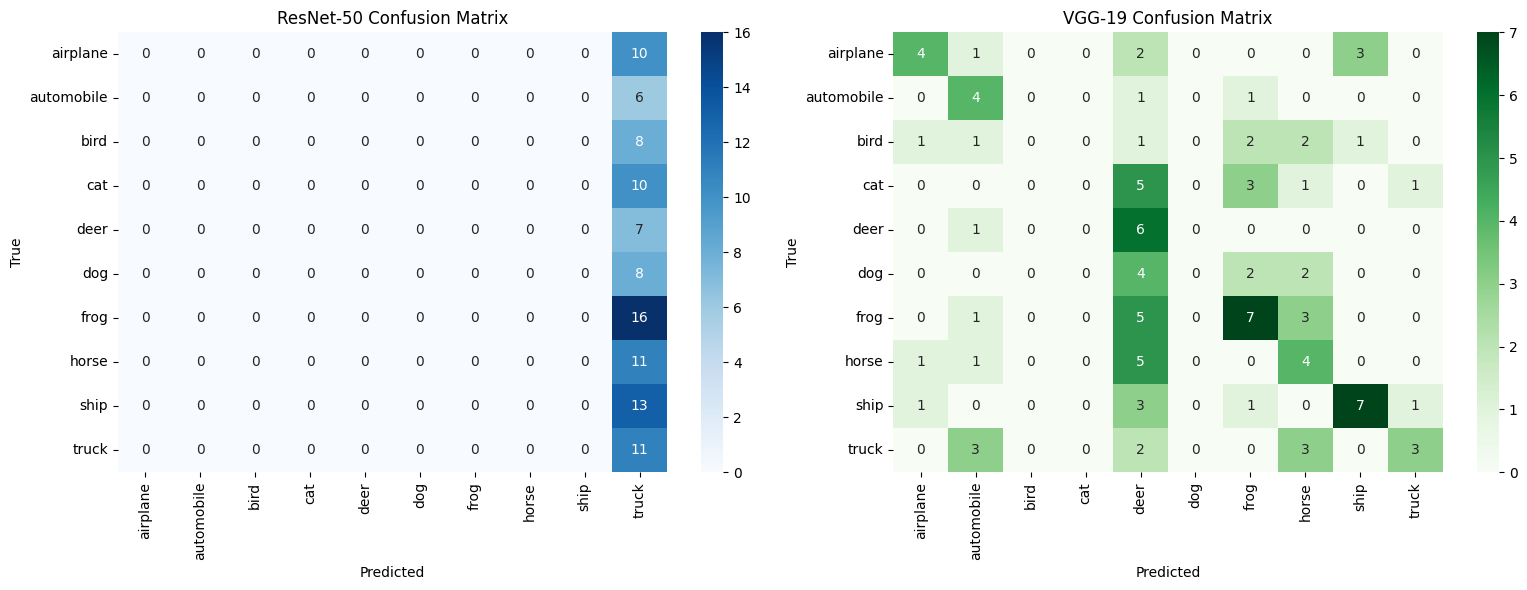

In [18]:
# Show confusion matrix for both models
from sklearn.metrics import confusion_matrix
resnet_pred_labels = np.argmax(resnet_model.predict(test_images_resized), axis=1)
vgg_pred_labels = np.argmax(vgg_model.predict(test_images_resized), axis=1)
cm_resnet = confusion_matrix(test_labels_flat, resnet_pred_labels)
cm_vgg = confusion_matrix(test_labels_flat, vgg_pred_labels)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('ResNet-50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(1,2,2)
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.title('VGG-19 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Summary

This notebook compared the performance of ResNet-50 and VGG-19 on the CIFAR10 dataset using transfer learning. You can see the validation accuracy and confusion matrices for both models above. Try adjusting the number of epochs or unfreezing layers for further improvements.

---

**Notebook Workflow Recap:**

- **Importing Libraries**: Essential Python libraries for deep learning, data manipulation, and visualization.
- **Loading Data**: CIFAR10 dataset with 60,000 color images in 10 classes.
- **Preprocessing**: Resize images to 224x224 pixels and normalize pixel values.
- **Visualization**: Display 25 sample images with class names.
- **Model Setup**: Build ResNet-50 and VGG-19 models with transfer learning and custom classification heads.
- **Training**: Train both models for 10 epochs.
- **Evaluation**: Visualize training histories and compare test accuracy.
- **Confusion Matrix**: Plot confusion matrices for both models.
- **Summary**: Encourage further experimentation.

This notebook guides you through applying and comparing state-of-the-art deep learning models on a benchmark dataset, highlighting the power of transfer learning.
